<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DM_assignment_5/blob/main/Graph%20Data/graph_dataset.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank" href="https://medium.com/@rutikrasik.darda/data-mining-a-graph-dataset-with-chat-gpt-4-7b7604d2ee7d">Open in Medium Article</a>

**EDA -**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/graph_dataset.csv')


In [2]:
# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Statistical summary of numeric columns
print(df.describe())


      Source     Target  Source_Age Source_Gender  Target_Age Target_Gender
0  Person_34  Person_18          57          Male          28        Female
1  Person_32   Person_2          24        Female          53        Female
2  Person_23   Person_7          39        Female          36          Male
3  Person_42  Person_37          30          Male          33        Female
4   Person_8  Person_35          24          Male          40        Female
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Source         100 non-null    object
 1   Target         100 non-null    object
 2   Source_Age     100 non-null    int64 
 3   Source_Gender  100 non-null    object
 4   Target_Age     100 non-null    int64 
 5   Target_Gender  100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB
None
       Source_Age  Target_Age
count   100.

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates and remove them if any
df = df.drop_duplicates()

# Any other data cleaning can be performed based on the initial exploration


Source           0
Target           0
Source_Age       0
Source_Gender    0
Target_Age       0
Target_Gender    0
dtype: int64


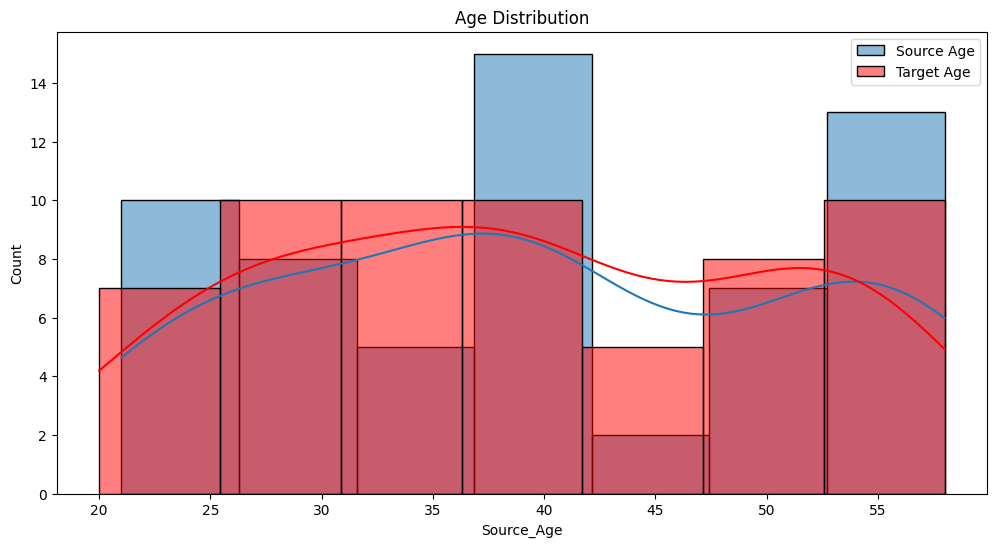

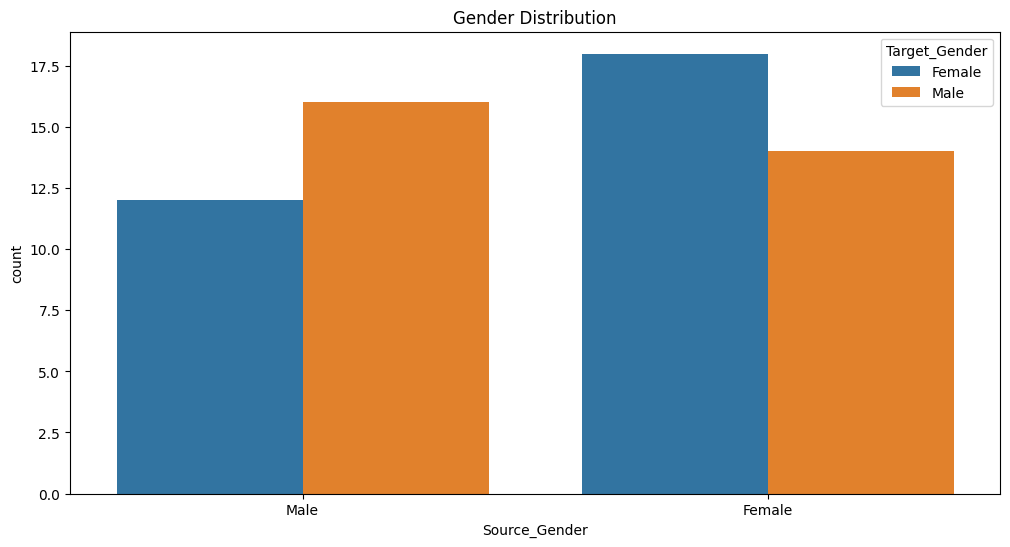

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Source_Age and Target_Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Source_Age'], kde=True, label='Source Age')
sns.histplot(df['Target_Age'], kde=True, color='red', label='Target Age')
plt.legend()
plt.title('Age Distribution')
plt.show()

# Gender distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Source_Gender', hue='Target_Gender')
plt.title('Gender Distribution')
plt.show()

# Further visualizations can be added based on specific interests


In [6]:
# For instance, finding out which individuals have the most connections
connections = df['Source'].value_counts() + df['Target'].value_counts()
print(connections.sort_values(ascending=False).head(10))

# Further analysis can be based on specific questions or hypotheses


Person_33    6.0
Person_34    6.0
Person_47    5.0
Person_9     5.0
Person_16    4.0
Person_17    4.0
Person_11    4.0
Person_2     4.0
Person_21    4.0
Person_4     4.0
dtype: float64


**Clustering -**

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('/content/graph_dataset.csv')

# Convert categorical variables to numeric using Label Encoding
le_gender = LabelEncoder()
df['Source_Gender'] = le_gender.fit_transform(df['Source_Gender'])
df['Target_Gender'] = le_gender.transform(df['Target_Gender'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Source_Age', 'Source_Gender', 'Target_Age', 'Target_Gender']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

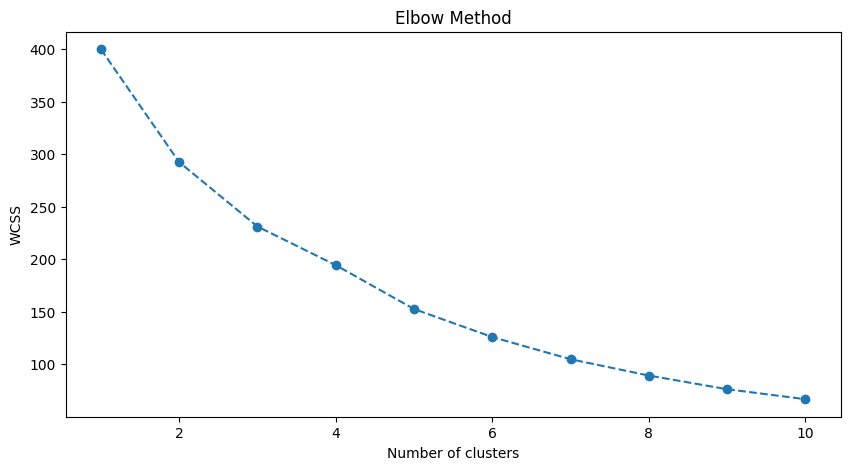

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow plot, choose an optimal number (say, k) and fit KMeans
k = 3  # You can choose a different number based on the elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters


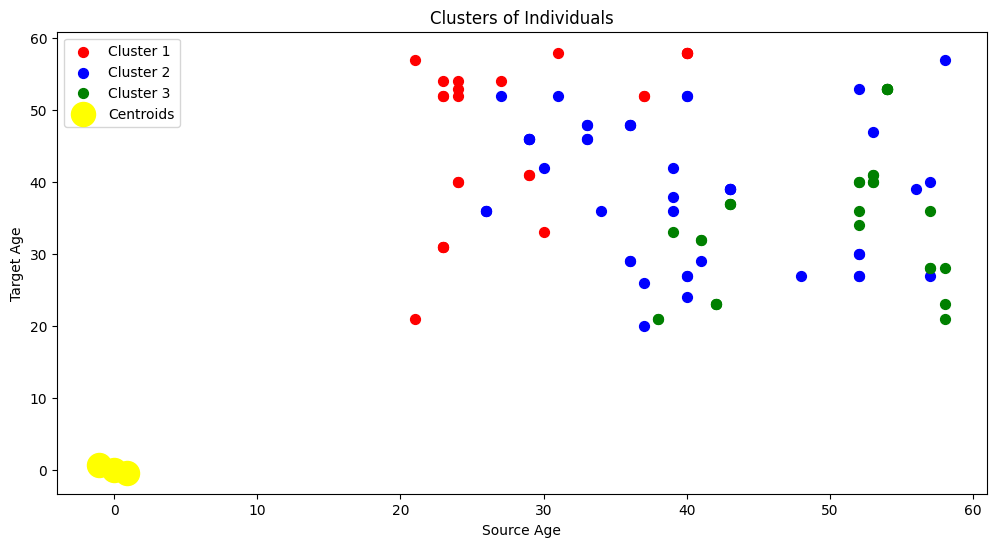

In [10]:
# Visualizing the clusters (for simplicity, we'll use Source_Age and Target_Age)
plt.figure(figsize=(12, 6))
plt.scatter(df['Source_Age'][df['Cluster'] == 0], df['Target_Age'][df['Cluster'] == 0], s=50, c='red', label='Cluster 1')
plt.scatter(df['Source_Age'][df['Cluster'] == 1], df['Target_Age'][df['Cluster'] == 1], s=50, c='blue', label='Cluster 2')
plt.scatter(df['Source_Age'][df['Cluster'] == 2], df['Target_Age'][df['Cluster'] == 2], s=50, c='green', label='Cluster 3')
# ... add more clusters if you chose k > 3
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Individuals')
plt.xlabel('Source Age')
plt.ylabel('Target Age')
plt.legend()
plt.show()


**Model -**

In [11]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 109.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 133.5 MB

In [12]:
import pandas as pd

df = pd.read_csv('/content/graph_dataset.csv')


In [14]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [15]:
from pycaret.regression import *

# Assuming we're predicting 'Target_Age'
exp_reg = setup(data=df, target='Target_Age', session_id=123)


,Description,Value
0,Session id,123
1,Target,Target_Age
2,Target type,Regression
3,Original data shape,"(100, 6)"
4,Transformed data shape,"(100, 6)"
5,Transformed train set shape,"(70, 6)"
6,Transformed test set shape,"(30, 6)"
7,Ordinal features,2
8,Numeric features,1
9,Categorical features,4


In [16]:
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,2.5927,34.4581,5.4194,0.6433,0.1474,0.0844,0.0810
ada,AdaBoost Regressor,2.7872,34.9661,5.4914,0.6362,0.1493,0.0894,0.0980
rf,Random Forest Regressor,2.7794,35.3965,5.5160,0.6322,0.1499,0.0901,0.1550
dt,Decision Tree Regressor,2.5286,35.9286,5.5588,0.6270,0.1513,0.0829,0.0610
gbr,Gradient Boosting Regressor,2.6301,37.1482,5.6230,0.6208,0.1531,0.0884,0.0860
huber,Huber Regressor,3.0659,37.5152,5.6711,0.6142,0.1541,0.0997,0.1240
et,Extra Trees Regressor,2.8110,37.2475,5.6354,0.6142,0.1537,0.0936,0.1360
ridge,Ridge Regression,3.0917,37.5088,5.6725,0.6127,0.1541,0.0998,0.1360
lr,Linear Regression,3.0422,37.5405,5.6793,0.6126,0.1541,0.0983,0.9160
br,Bayesian Ridge,3.0491,37.5357,5.6781,0.6126,0.1541,0.0985,0.1890


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [17]:
lr_model = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3952,6.6366,2.5762,0.9296,0.0676,0.0391
1,3.0581,43.1946,6.5723,0.2950,0.1340,0.0563
2,4.8439,54.9035,7.4097,0.4704,0.1962,0.1427
3,3.0744,27.2561,5.2207,0.7211,0.1434,0.0924
4,5.9527,92.9142,9.6392,0.0839,0.3012,0.2528
5,1.8830,18.5891,4.3115,0.8154,0.0919,0.0382
6,3.3734,63.3618,7.9600,0.3317,0.2623,0.1591
7,2.3719,21.9641,4.6866,0.7722,0.1005,0.0472
8,3.2513,43.1754,6.5708,0.7517,0.2009,0.1266


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
tuned_lr = tune_model(lr_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3952,6.6366,2.5762,0.9296,0.0676,0.0391
1,3.0581,43.1946,6.5723,0.2950,0.1340,0.0563
2,4.8439,54.9035,7.4097,0.4704,0.1962,0.1427
3,3.0744,27.2561,5.2207,0.7211,0.1434,0.0924
4,5.9527,92.9142,9.6392,0.0839,0.3012,0.2528
5,1.8830,18.5891,4.3115,0.8154,0.0919,0.0382
6,3.3734,63.3618,7.9600,0.3317,0.2623,0.1591
7,2.3719,21.9641,4.6866,0.7722,0.1005,0.0472
8,3.2513,43.1754,6.5708,0.7517,0.2009,0.1266


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
final_model = finalize_model(tuned_lr)

# Save the model
save_model(final_model, 'final_lr_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Source_Age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Source', 'Target',
                                              'Source_Gender', 'Target_Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Source_...
                                                                mapping=[{'col': 'Source_Gender',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Female    0
 Male      1
 NaN      -1
 dtype: int64},
                                                                         {'col':